### **1.EDA and Preprocessing**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from wordcloud import WordCloud

In [4]:
df = pd.read_csv('Data/dataset.csv')
df.head()

,hotel_name,review_summary,score,review
0,Hotel Hilton London Gatwick Airport,Awful...,1,Its hard to find words that can describe this ...
1,Hilton London Metropole,Terrible,1,"Absolutely terrible. Cracked ceiling, tiny roo..."
2,Hilton London Euston,Double deposit taken from bank,1,Very disappointed firstly i checked in online ...
3,Hilton London Metropole,Super disappointed!,1,First of all we arrived wanting to park at the...
4,Hilton London Metropole,Dissatisfied Hilton gold number,1,"Hello, I currently staying @ Hilton Metropole..."


In [5]:
df.shape

(9405, 4)

### **2.Checking Frequency of Words in Review Summaries**

In [6]:
flat_review_summary = " ".join(df['review_summary'].values)

In [7]:
# tokinizer the review summary
words = []
tokenizer = RegexpTokenizer(r'[a-zA-Z]+')
tokenized_reviews = tokenizer.tokenize(flat_review_summary)
print(tokenized_reviews)

['Awful', 'Terrible', 'Double', 'deposit', 'taken', 'from', 'bank', 'Super', 'disappointed', 'Dissatisfied', 'Hilton', 'gold', 'number', 'Wouldn', 't', 'refund', 'even', 'though', 'a', 'government', 'ban', 'on', 'travel', 'Stay', 'away', 'you', 'can', 't', 'trust', 'them', 'Only', 'sty', 'here', 'if', 'nothing', 'else', 'is', 'available', 'in', 'london', 'Rude', 'staff', 'Just', 'plain', 'awful', 'staff', 'attitude', 'Terrible', 'Experience', 'In', 'desperate', 'need', 'of', 'a', 'refurb', 'Totally', 'unacceptable', 'Filthy', 'Worst', 'hotel', 'i', 'have', 'ever', 'stayed', 'in', 'Avoid', 'level', 'at', 'any', 'cost', 'Stay', 'clear', 'al', 'staff', 'attitude', 'appalling', 'Avoid', 'at', 'all', 'costs', 'not', 'what', 'you', 'd', 'expect', 'from', 'a', 'Hilton', 'Brand', 'Airport', 'stop', 'over', 'Building', 'work', 'outside', 'of', 'room', 'window', 'Extremely', 'disappointing', 'Needs', 'knocking', 'down', 'Terrible', 'experience', 'Noisy', 'air', 'con', 'Avoid', 'Work', 'trip', 'S

In [8]:
# convert word  into lower case
for review in tokenized_reviews:
    words.append(review.lower())

In [9]:
nltk.download('stopwords')
stop_words = stopwords.words("english")
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ramji\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
# remove stop words
final_words = [word for word in words if word not in stop_words]

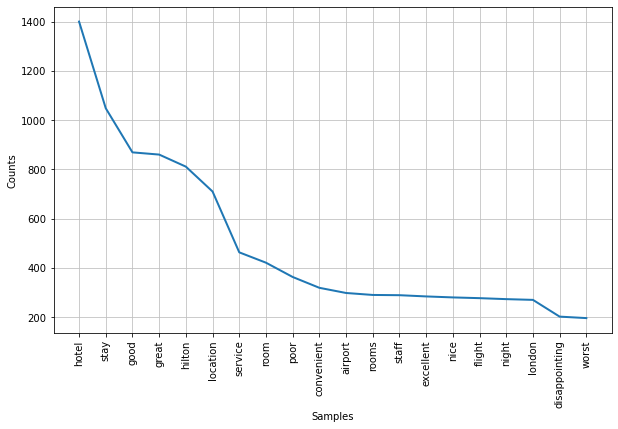

In [11]:
plt.figure(figsize=(10,6))
FreqDist(final_words).plot(20)
plt.show()

### **2. Removing Unmeaningful Words 1 attempt**





In [13]:
for word in ['hotel','stay','hilton','location','room','service','airport','staff','london','night','flight','overnight','rooms']:
  stop_words.append(word)

In [14]:
final_words = [word for word in words if word not in stop_words]

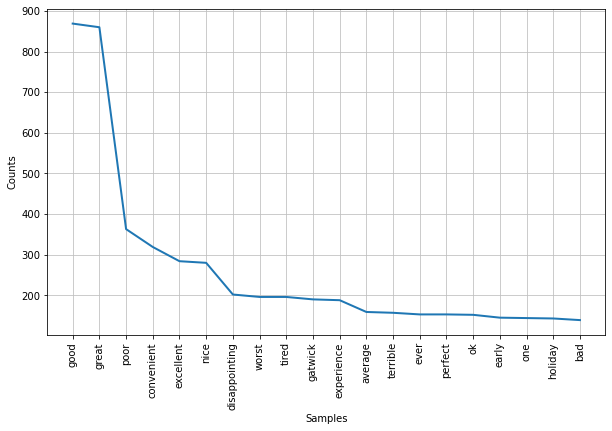

In [15]:
plt.figure(figsize=(10,6))
FreqDist(final_words).plot(20)
plt.show()

### **2. Removing Unmeaningful Words 2 attempt**



In [16]:
for word in ['experience','gatwick','ever','holiday','one']:
    stop_words.append(word)

In [17]:
final_words = [word for word in words if word not in stop_words]

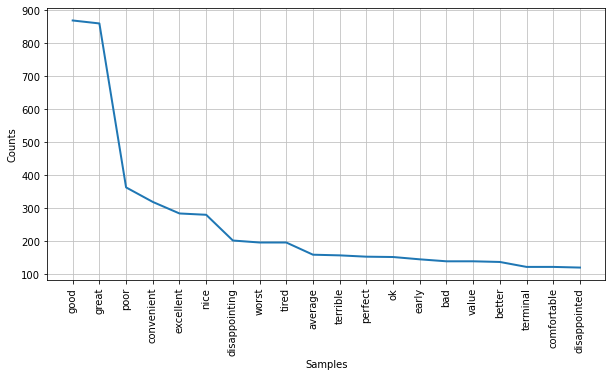

In [19]:
plt.figure(figsize=(10,5))
FreqDist(final_words).plot(20)
plt.show()

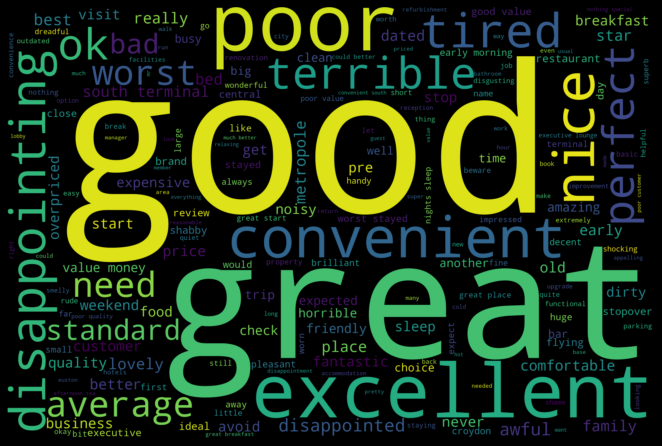

In [22]:
flat_clean_sum_str = " ".join(final_words)
wordcloud = WordCloud(width = 3000,
                      height = 2000,
                      background_color = 'black',
                      stopwords = stop_words)

wordcloud.generate(flat_clean_sum_str)

plt.figure(figsize = (10,6),
           facecolor = 'k',
           edgecolor = 'k')

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### **2.Checking Frequency of Words in Review**

In [23]:
df.dropna(axis=0,inplace = True)

In [24]:
flat_review = " ".join(df['review'].values)

In [25]:
# tokinizer the review summary
review_words = []
tokenizer = RegexpTokenizer(r'[a-zA-Z]+')
tokenized_reviews = tokenizer.tokenize(flat_review)


In [26]:
for word in tokenized_reviews:
  review_words.append(word.lower())

In [27]:
stop_words = stopwords.words("english")
final_words = [word for word in review_words if word not in stop_words]

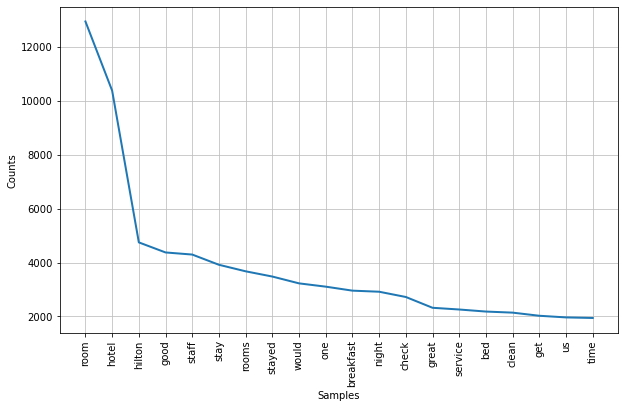

In [28]:
plt.figure(figsize=(10,6))
FreqDist(final_words).plot(20)
plt.show()

In [29]:
for word in ['room','hotel','hilton','staff','stayed','would','breakfast','bed','check','get','us','time','reception','terminal','bar','food','booked','walk','bathroom']:
    stop_words.append(word)

In [30]:
flat_list_reviews_no_stop_2 =  [word for word in review_words if word not in stop_words]

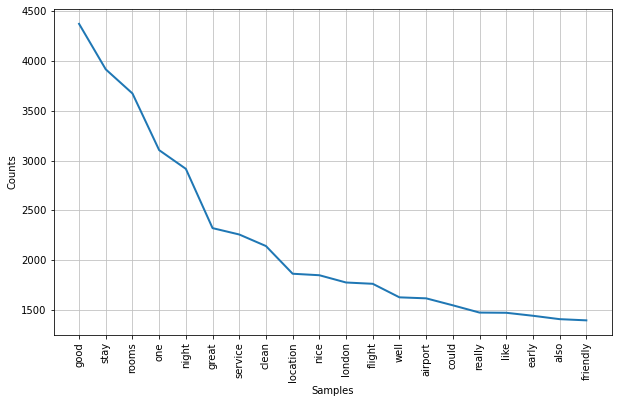

In [31]:

plt.figure(figsize=(10,6))
FreqDist(flat_list_reviews_no_stop_2).plot(20)
plt.show()

In [32]:
for word in ['stay','one','night','clean','service','location','london','flight','airport','restaurant','really','early','could','also','rooms','restaurant','morning','even','floor','next','back','day','two']:
    stop_words.append(word)

In [33]:
flat_list_reviews_no_stop_3 =  [word for word in review_words if word not in stop_words]

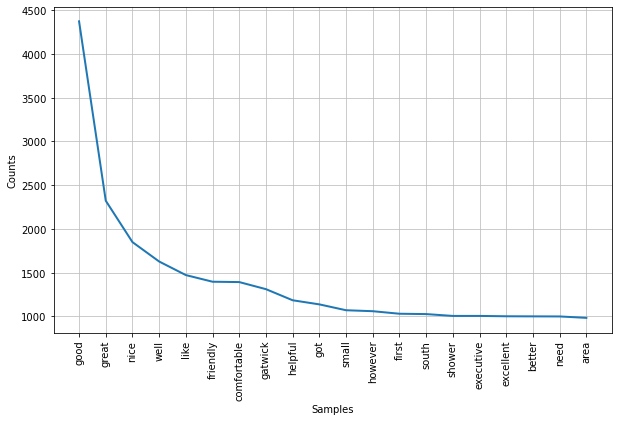

In [34]:
plt.figure(figsize=(10,6))
FreqDist(flat_list_reviews_no_stop_3).plot(20)
plt.show()

In [35]:
for word in ['south','excutive','area','however','got','small','bit','need','station']:
    stop_words.append(word)

In [36]:
flat_list_reviews_no_stop_5 =  [word for word in review_words if word not in stop_words]

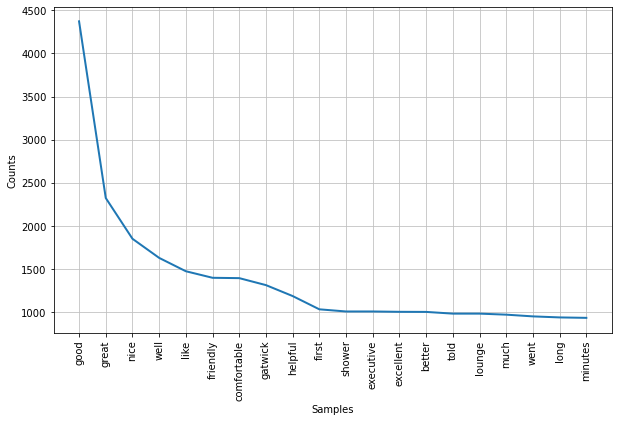

In [37]:
plt.figure(figsize=(10,6))
FreqDist(flat_list_reviews_no_stop_5).plot(20)
plt.show()

### **Word Cloud for Reviews**

In [38]:
flat_clean_str = " ".join(flat_list_reviews_no_stop_5)

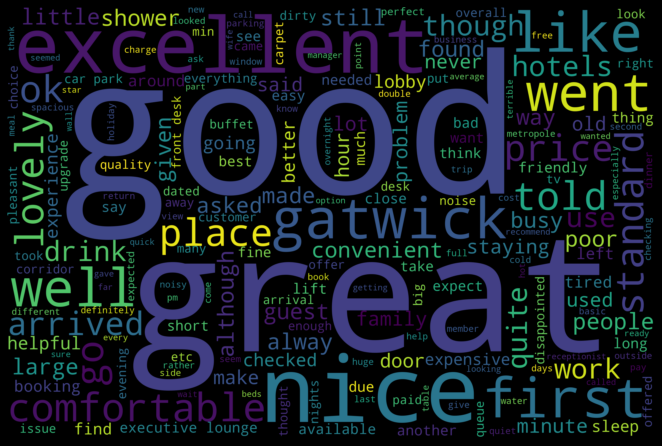

In [39]:
wordcloud = WordCloud(width = 3000,
                      height = 2000,
                      background_color = 'black',
                      stopwords = stop_words)

wordcloud.generate(flat_clean_str)

plt.figure(figsize = (10,6),
           facecolor = 'k',
           edgecolor = 'k')

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### **Stemming and Lemming**

In [36]:
stemmer = PorterStemmer()
lemmy = WordNetLemmatizer()

In [37]:
def apply_stem(doc):
    
    doc_split = doc.split(' ')
    stem_doc = ''
    for word in doc_split:
        stem_doc += stemmer.stem(word) + ' '
        
    return stem_doc



def apply_lem(doc):
    
    doc_split = doc.split(' ')
    lem_v_doc = ''
    for word in doc_split:
        lem_v_doc += lemmy.lemmatize(word, pos='v') + ' '
        
    doc_split = lem_v_doc.split(' ')
    lem_doc = ''
    for word in doc_split:
        lem_doc += lemmy.lemmatize(word, pos='a') + ' '
        
    return lem_doc

In [38]:
nltk.download('wordnet')
df['review_stemmed'] = df['review'].apply(apply_stem)
df['review_lemmed'] = df['review'].apply(apply_lem)

df['review_summary_stemmed'] = df['review_summary'].apply(apply_stem)
df['review_summary_lemmed'] = df['review_summary'].apply(apply_lem)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ramji\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


In [39]:
df.head()

,hotel_name,review_summary,score,review,review_stemmed,review_lemmed,review_summary_stemmed,review_summary_lemmed
0,Hotel Hilton London Gatwick Airport,Awful...,1,Its hard to find words that can describe this ...,it hard to find word that can describ thi expe...,Its hard to find word that can describe this e...,awful...,Awful...
1,Hotel Hilton London Gatwick Airport,Great start to hokidat,5,Staying in a hotel that’s part of the airport ...,stay in a hotel that’ part of the airport itse...,Staying in a hotel that’s part of the airport ...,great start to hokidat,Great start to hokidat
2,Hotel Hilton London Gatwick Airport,A good overnight stay!,5,My wife and I stayed at this hotel for one nig...,My wife and I stay at thi hotel for one night ...,My wife and I stay at this hotel for one night...,A good overnight stay!,A good overnight stay!
3,Hotel Hilton London Gatwick Airport,Satisfactory one night stay,4,One night stay which turned out to be much be...,one night stay which turn out to be much bett...,One night stay which turn out to be much good...,satisfactori one night stay,Satisfactory one night stay
4,Hotel Hilton London Gatwick Airport,"Still nice but looking a bit sad, old and dated",4,We had an executive room and even these are st...,We had an execut room and even these are start...,We have an executive room and even these be st...,"still nice but look a bit sad, old and date","Still nice but look a bite sad, old and date"


### **2.5 Train Test Split**

In [40]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=['hotel_name','score']), 
                                                    df['score'], 
                                                    test_size=.2, 
                                                    random_state=42)

In [41]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(14028, 6)
(3508, 6)
(14028,)
(3508,)


In [ ]:

y_train_df = pd.DataFrame(y_train).reset_index(drop=True)
y_test_df = pd.DataFrame(y_test).reset_index(drop=True)
y_train_df.head()

### **TF-IDF Vectorisation for Reviews**

In [42]:
tokenizer = RegexpTokenizer(r'[a-zA-Z]+')

tf_idf_vect = TfidfVectorizer(lowercase=True,
                              tokenizer = tokenizer.tokenize, 
                              stop_words=stop_words, 
                              ngram_range=(1,2),
                              min_df = 0.05)
 
x_lemm_train_tfidf_sparse = tf_idf_vect.fit_transform(x_train['review_lemmed'])

x_lemm_test_tfidf_sparse = tf_idf_vect.transform(x_test['review_lemmed'])


x_lemm_train_tfidf = pd.DataFrame(x_lemm_train_tfidf_sparse.toarray(), 
                                  columns=tf_idf_vect.get_feature_names())

x_lemm_test_tfidf = pd.DataFrame(x_lemm_test_tfidf_sparse.toarray(), 
                                  columns=tf_idf_vect.get_feature_names())


x_lemm_train_tfidf.head()

,access,although,always,another,around,arrive,ask,away,bad,best,...,upgrade,use,visit,wait,want,water,way,well,wifi,work
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,...,0.0,0.264580,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.496031,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.48111,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.185791,0.000000,0.426037
3,0.0,0.0,0.0,0.0,0.0,0.276892,0.0,0.0,0.00000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,...,0.0,0.187309,0.0,0.0,0.223971,0.242066,0.0,0.000000,0.000000,0.000000


In [43]:
tokenizer_summary = RegexpTokenizer(r'[a-zA-Z]+')

tf_idf_vect_summary = TfidfVectorizer(lowercase=True, 
                                      tokenizer = tokenizer_summary.tokenize, 
                                      stop_words=stop_words, 
                                      ngram_range=(1,2),
                                      min_df = 0.01)

x_lemm_train_summary_tfidf_sparse = tf_idf_vect_summary.fit_transform(x_train['review_summary_lemmed'])

x_lemm_test_summary_tfidf_sparse = tf_idf_vect_summary.transform(x_test['review_summary_lemmed'])


x_lemm_train_summary_tfidf = pd.DataFrame(x_lemm_train_summary_tfidf_sparse.toarray(), 
                                          columns=tf_idf_vect_summary.get_feature_names())

x_lemm_test_summary_tfidf = pd.DataFrame(x_lemm_test_summary_tfidf_sparse.toarray(), 
                                         columns=tf_idf_vect_summary.get_feature_names())


x_lemm_train_summary_tfidf.head()

,average,bad,best,business,comfortable,convenient,disappointing,excellent,experience,family,...,place,poor,pre,price,standard,start,terrible,trip,value,weekend
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.831907,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.858905,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


### **Joining Reviews With Review Summaries**

In [44]:
x_lemm_summary_train_text = x_lemm_train_summary_tfidf.join(x_lemm_train_tfidf, lsuffix='_sum')
x_lemm_summary_test_text = x_lemm_test_summary_tfidf.join(x_lemm_test_tfidf, lsuffix='_sum')


In [45]:
print(x_lemm_summary_train_text.shape)
print(x_lemm_summary_test_text.shape)
print(y_train.shape)
print(y_test.shape)

(14028, 155)
(3508, 155)
(14028,)
(3508,)


### **Saving Dataset as CSVs**

In [46]:
x_lemm_summary_train_text.to_csv('Data/2.x_train_data.csv',index=False)
x_lemm_summary_test_text.to_csv('Data/2.x_test_data.csv',index=False)
y_train.to_csv('Data/2.y_train_data.csv',index=False)
y_test.to_csv('Data/2.y_test_data.csv',index=False)